In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
%matplotlib inline

In [52]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [53]:
def load_graph(graph_file):
    print(f"Loading graph from {graph_file}...")
    start_time = time.time()
    G = nx.read_graphml(graph_file)
    end_time = time.time()
    print(f"Graph loaded in {end_time - start_time:.2f} seconds. It has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

In [54]:
G = load_graph("spotify_AugWeek1.graphml")

Loading graph from spotify_AugWeek1.graphml...


FileNotFoundError: [Errno 2] No such file or directory: 'spotify_AugWeek1.graphml'

In [ ]:
def degree_distribution_stats(G):
    N = len(G)
    L = G.size()
    degrees = [G.degree(node) for node in G]
    kmin = min(degrees)
    kmax = max(degrees)

    print("Number of nodes: ", N)
    print("Number of edges: ", L)
    print()
    print("Average degree: ", 2*L/N)
    print("Average degree (alternate calculation)", np.mean(degrees))
    print()
    print("Minimum degree: ", kmin)
    print("Maximum degree: ", kmax)

In [ ]:
# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G, title="Degree Distribution"):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none', c='g')
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(title)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Number of nodes:  8767
Number of edges:  87664

Average degree:  19.998631230751684
Average degree (alternate calculation) 19.998631230751684

Minimum degree:  1
Maximum degree:  622


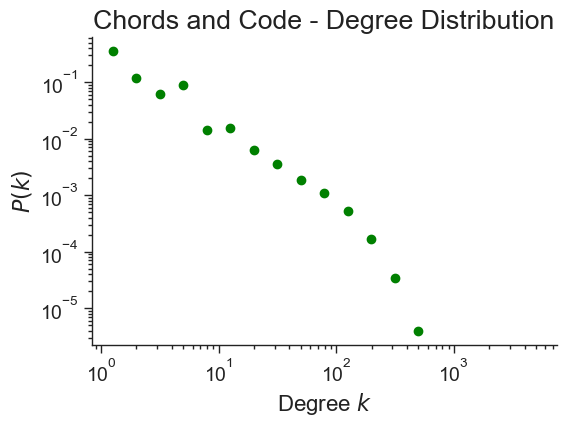

In [ ]:
degree_distribution_stats(G)
plot_degree_dist(G, "Chords and Code - Degree Distribution")

# Clustering Coefficient and Shortest Path

In [ ]:
# Find the clustering coefficient for our new filtered graph H
C = np.mean(list(nx.clustering(G).values()))
print("Average Clustering Coefficient: ", C)

Average Clustering Coefficient:  0.6633726260731514


Now find it for the largest component, to ensure we are calculating it for a component that is entirely connected

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph of G containing only the nodes in largest_cc
G_largest = G.subgraph(largest_cc)

In [ ]:
# Calculate clustering coefficient
# Calculate the shortest path
C = np.mean(list(nx.clustering(G_largest).values()))
d = nx.average_shortest_path_length(G_largest,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

KeyboardInterrupt: 

# Degree Preservation Analysis (ER and Double-Edge Swap)

In [ ]:
GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

KeyboardInterrupt: 

In [ ]:
# Calculating metrics for a Degree Preservation Graph

DP = G.copy()

clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    
    nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

In [ ]:
fig = plt.figure(figsize=(6,4))

plt.boxplot([clustering_ER,clustering_DP], positions=[1,2])
plt.plot(3,C,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2,3],labels=['ER','DP','Spotify Playlists'])
plt.ylabel('Clustering')
plt.xlim([0.5,3.5])
plt.show()